<a href="https://colab.research.google.com/github/akashpbk/Income-Classification---ML-Project/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****INCOME CLASSIFICATION USING CENSUS DATA****

#### Introduction:
In this project, I used a dataset containing demographic information and salary data to predict whether a person's salary is above or below 50K dollars. The dataset includes features such as age, work class, education, marital status, occupation, relationship, gender, hours per week, and country.

The data set is extracted from US Census database.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### DATA

In [ ]:
df = pd.read_csv("/content/adult_income_data.csv")

In [ ]:
df.head()

,Unnamed: 0,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,7762,18.0,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,20.0,United-States,<=50K
1,23881,17.0,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K
2,30507,25.0,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28911,20.0,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
4,19484,47.0,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0.0,0.0,56.0,Puerto-Rico,<=50K


In [ ]:
df.tail()

,Unnamed: 0,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
48837,11284,35.0,Private,200117,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0.0,1887.0,50.0,?,>50K
48838,44732,21.0,Private,90896,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K.
48839,38158,23.0,Private,370057,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K.
48840,860,18.0,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K
48841,15795,50.0,Self-emp-not-inc,54261,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,84.0,United-States,<=50K


In [ ]:
df.shape

(48842, 16)

In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'work_class', 'final_weight', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country', 'income'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0          int64
age               float64
work_class         object
final_weight        int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income             object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      48842 non-null  int64  
 1   age             48709 non-null  float64
 2   work_class      48842 non-null  object 
 3   final_weight    48842 non-null  int64  
 4   education       48842 non-null  object 
 5   education_num   48842 non-null  int64  
 6   marital_status  48842 non-null  object 
 7   occupation      48842 non-null  object 
 8   relationship    48842 non-null  object 
 9   race            48842 non-null  object 
 10  sex             48842 non-null  object 
 11  capital_gain    48729 non-null  float64
 12  capital_loss    48723 non-null  float64
 13  hours_per_week  48707 non-null  float64
 14  native_country  48842 non-null  object 
 15  income          48842 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 6.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,48709.000000,4.884200e+04,48842.000000,48729.000000,48723.000000,48707.000000
mean,24420.500000,38.632470,1.896641e+05,10.078089,1081.296846,87.459988,40.410865
std,14099.615261,13.718035,1.056040e+05,2.570973,7460.430825,402.958099,12.393736
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,12210.250000,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,24420.500000,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,36630.750000,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isna().sum()

Unnamed: 0          0
age               133
work_class          0
final_weight        0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain      113
capital_loss      119
hours_per_week    135
native_country      0
income              0
dtype: int64

In [ ]:
# The missing values are very small compared to the size of the dataset. So we romove the missing values
df.dropna(inplace=True)

## EXPLORATORY DATA ANALYSIS

#### CHECKING THE DATA SET IMBALANCE

In [ ]:
df['income'].value_counts()

 <=50K     24720
 <=50K.    12184
 >50K       7841
 >50K.      3597
Name: income, dtype: int64

In [ ]:
# We can see that there is 4 caategories in the target which is actually 2.
# This is due to the unnecesary dot('.')
# so we are removing this '.'
df['income'] = df['income'].str.replace('.','',regex=False)
df['income'].unique()

df['income'].value_counts()

 <=50K    36904
 >50K     11438
Name: income, dtype: int64

Text(0.5, 1.0, 'Target Variables')

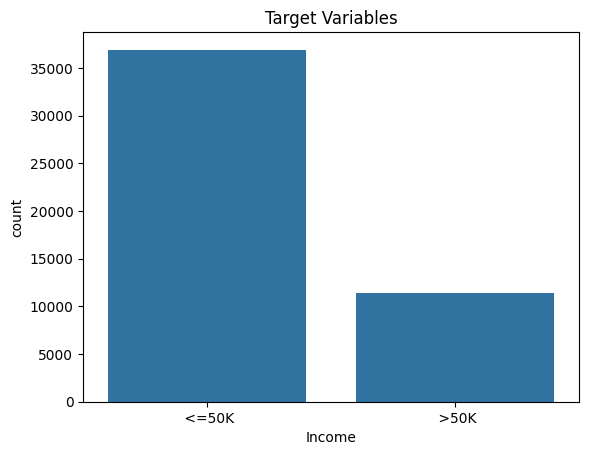

In [ ]:
sns.countplot(x=df['income'])
plt.xlabel('Income')
plt.title('Target Variables')

we can clearly see that the data set is imbalanced. We will deal it later.

#### EXPLORING THE UNIQUE DATA AND CATEGORIES

In [ ]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print()

Unnamed: 0
7762     1
27977    1
12282    1
5717     1
42077    1
        ..
23309    1
48680    1
6081     1
23568    1
15795    1
Name: Unnamed: 0, Length: 48342, dtype: int64

age
36.0    1333
23.0    1328
33.0    1317
35.0    1315
31.0    1310
        ... 
88.0       6
85.0       4
87.0       3
89.0       2
86.0       1
Name: age, Length: 74, dtype: int64

work_class
 Private             33565
 Self-emp-not-inc     3814
 Local-gov            3101
 ?                    2799
 State-gov            1958
 Self-emp-inc         1662
 Federal-gov          1412
 Without-pay            21
 Never-worked           10
Name: work_class, dtype: int64

final_weight
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
279272     1
90222      1
420691     1
274562     1
54261      1
Name: final_weight, Length: 28350, dtype: int64

education
 HS-grad         15617
 Some-college    10775
 Bachelors        7918
 Masters          2616
 Assoc-voc        2038
 11th             180

#### CHECKING FOR DUPLICATE DATA COLUMN

In [ ]:
edu_num = list(df['education_num'].unique())
edu_num.sort()

In [ ]:
edu_num

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [ ]:
education_dict = {}
for i in edu_num:
    education_dict[df[df['education_num']==i]['education'].unique()[0]]=i
education_dict

{' Preschool': 1,
 ' 1st-4th': 2,
 ' 5th-6th': 3,
 ' 7th-8th': 4,
 ' 9th': 5,
 ' 10th': 6,
 ' 11th': 7,
 ' 12th': 8,
 ' HS-grad': 9,
 ' Some-college': 10,
 ' Assoc-voc': 11,
 ' Assoc-acdm': 12,
 ' Bachelors': 13,
 ' Masters': 14,
 ' Prof-school': 15,
 ' Doctorate': 16}

In [ ]:
# We can see that there is an unnecessary column 'Unnamed: 0' and education follows a correct order in the 'education_num' column.
# So we can drop 'Unnamed: 0' and 'education'
df.drop(['Unnamed: 0','education'], axis=1, inplace=True)

In [ ]:
df

,age,work_class,final_weight,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,18.0,Private,423024,9,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,20.0,United-States,<=50K
1,17.0,Private,178953,8,Never-married,Sales,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K
2,25.0,Local-gov,348986,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,20.0,Private,218215,10,Never-married,Sales,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
4,47.0,Private,244025,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0.0,0.0,56.0,Puerto-Rico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,35.0,Private,200117,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0.0,1887.0,50.0,?,>50K
48838,21.0,Private,90896,9,Never-married,Machine-op-inspct,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
48839,23.0,Private,370057,9,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,18.0,Private,216284,7,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K


#### EXPLORING DATA IN CATEGORICAL FEATURES

In [ ]:
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].unique())

[' Private' ' Local-gov' ' ?' ' Federal-gov' ' State-gov'
 ' Self-emp-not-inc' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Never-married' ' Married-civ-spouse' ' Divorced' ' Widowed'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse']
[' Other-service' ' Sales' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Craft-repair' ' Prof-specialty' ' Adm-clerical' ' ?' ' Exec-managerial'
 ' Transport-moving' ' Farming-fishing' ' Tech-support' ' Protective-serv'
 ' Priv-house-serv' ' Armed-Forces']
[' Not-in-family' ' Own-child' ' Other-relative' ' Unmarried' ' Husband'
 ' Wife']
[' White' ' Black' ' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Other']
[' Male' ' Female']
[' United-States' ' Puerto-Rico' ' Mexico' ' England' ' South'
 ' Philippines' ' Germany' ' China' ' France' ' ?' ' Scotland' ' India'
 ' Columbia' ' Cuba' ' Japan' ' Hong' ' Canada' ' Guatemala' ' Peru'
 ' Vietnam' ' Honduras' ' Jamaica' ' Haiti' ' Ireland' ' Italy'
 ' Dominican-Republic' ' El-Salvador' ' Taiwan' '

In [ ]:
# we can see that there is an unnecessary space before each categories in the categorical feature.
# We have to remove this.
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=df[i].replace(' ','',regex=True)
        print(df[i].unique())

['Private' 'Local-gov' '?' 'Federal-gov' 'State-gov' 'Self-emp-not-inc'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Widowed'
 'Married-spouse-absent' 'Separated' 'Married-AF-spouse']
['Other-service' 'Sales' 'Handlers-cleaners' 'Machine-op-inspct'
 'Craft-repair' 'Prof-specialty' 'Adm-clerical' '?' 'Exec-managerial'
 'Transport-moving' 'Farming-fishing' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces']
['Not-in-family' 'Own-child' 'Other-relative' 'Unmarried' 'Husband' 'Wife']
['White' 'Black' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Other']
['Male' 'Female']
['United-States' 'Puerto-Rico' 'Mexico' 'England' 'South' 'Philippines'
 'Germany' 'China' 'France' '?' 'Scotland' 'India' 'Columbia' 'Cuba'
 'Japan' 'Hong' 'Canada' 'Guatemala' 'Peru' 'Vietnam' 'Honduras' 'Jamaica'
 'Haiti' 'Ireland' 'Italy' 'Dominican-Republic' 'El-Salvador' 'Taiwan'
 'Thailand' 'Portugal' 'Iran' 'Trinadad&Tobago' 'Hungary' 'Poland'
 'Nicara

In [ ]:
# Removing '?' containing rows in work_class, occupation and native_country
df.drop(df[df['work_class']=='?'].index,inplace=True)
df.drop(df[df['occupation']=='?'].index,inplace=True)
df.drop(df[df['native_country']=='?'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df['income'].value_counts()

<=50K    33763
>50K     10959
Name: income, dtype: int64

In [ ]:
# seperating INPUT and OUTPUT features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x

,age,work_class,final_weight,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,18.0,Private,423024,9,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,20.0,United-States
1,17.0,Private,178953,8,Never-married,Sales,Own-child,White,Female,0.0,0.0,20.0,United-States
2,25.0,Local-gov,348986,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0.0,0.0,40.0,United-States
3,20.0,Private,218215,10,Never-married,Sales,Own-child,White,Female,0.0,0.0,30.0,United-States
4,47.0,Private,244025,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0.0,0.0,56.0,Puerto-Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44717,63.0,Self-emp-not-inc,391121,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,30.0,United-States
44718,21.0,Private,90896,9,Never-married,Machine-op-inspct,Own-child,White,Female,0.0,0.0,40.0,United-States
44719,23.0,Private,370057,9,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States
44720,18.0,Private,216284,7,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,20.0,United-States


In [ ]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
44717    <=50K
44718    <=50K
44719    <=50K
44720    <=50K
44721    <=50K
Name: income, Length: 44722, dtype: object

#### CATEGORICAL FEATURES

In [ ]:
# finding the categorical features
categorical_features = [i for i in x.columns if x[i].dtype=='object']
categorical_features

['work_class',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

###### VISUALIZING THE CATEGORICAL FEATURES

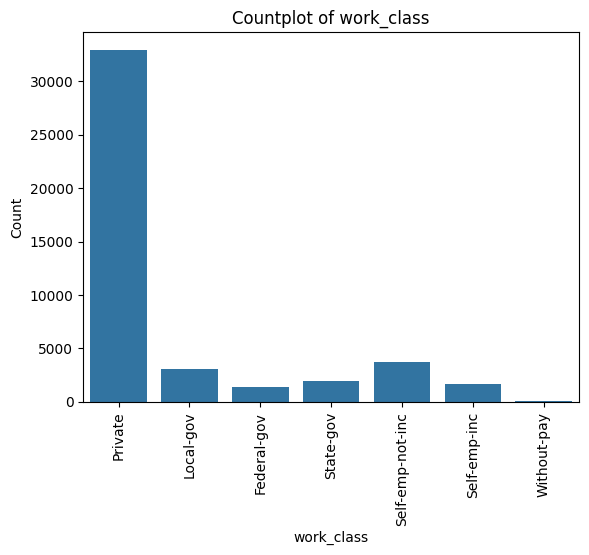

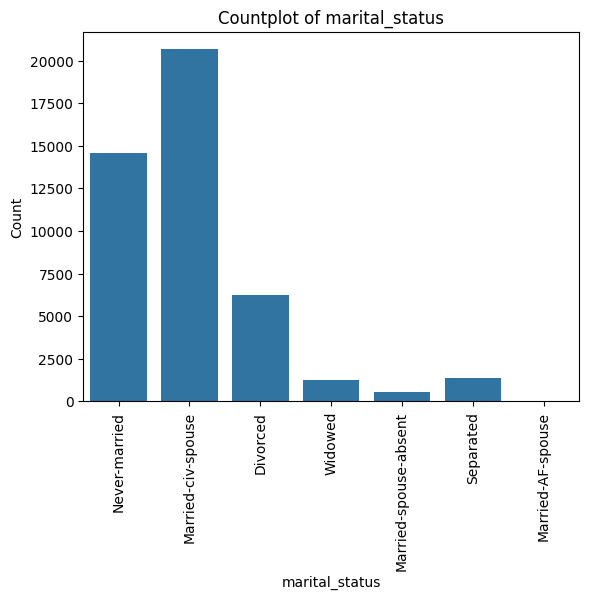

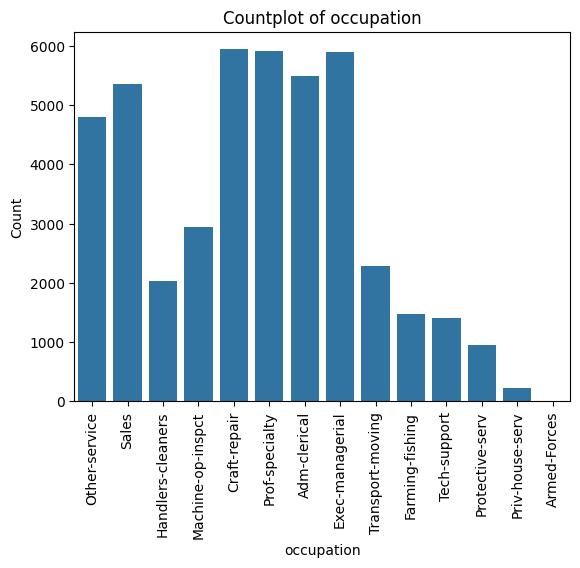

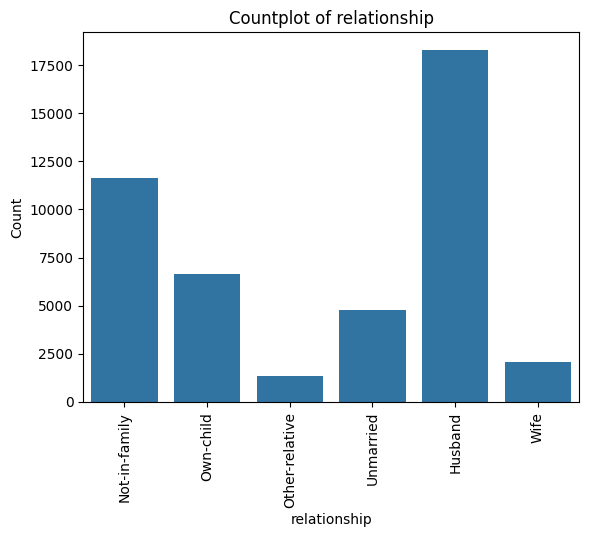

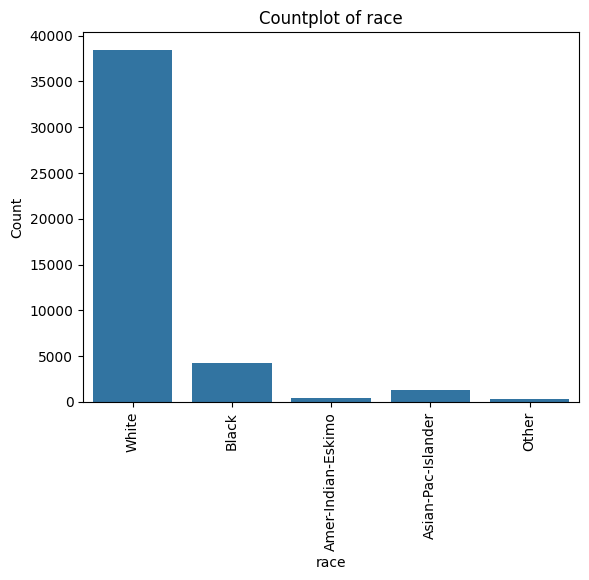

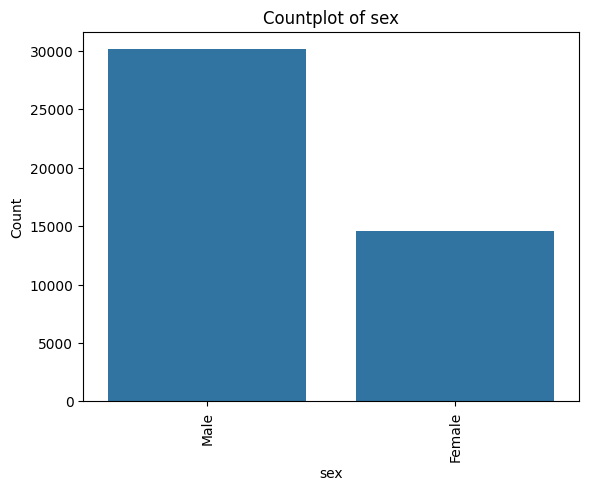

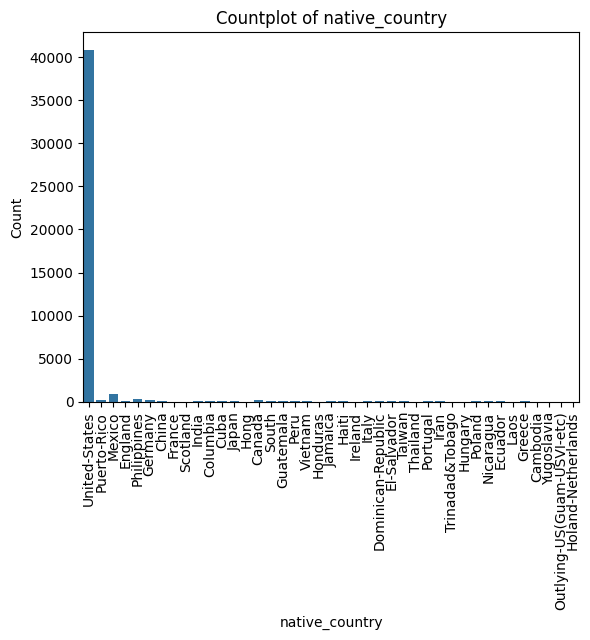

In [ ]:
for col in categorical_features:
    plt.figure()
    sns.countplot(x=x[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

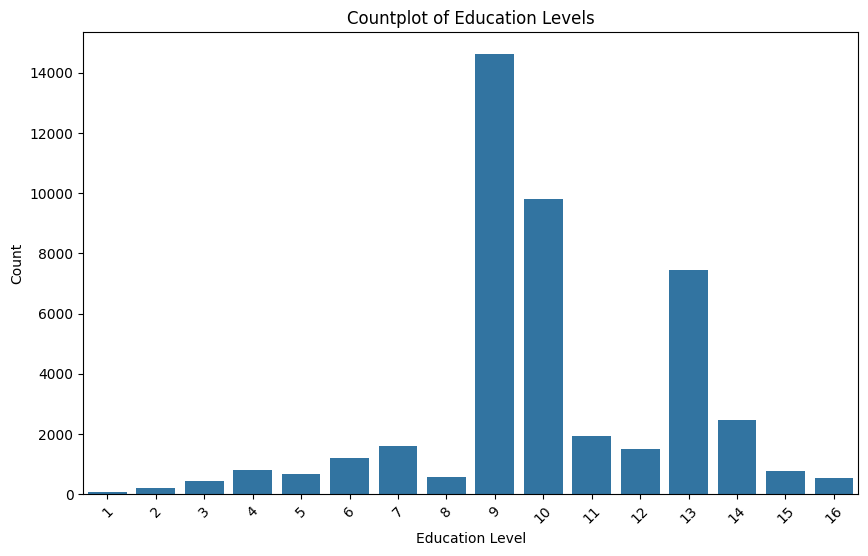

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=x['education_num'])
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Countplot of Education Levels')
plt.xticks(rotation=45)
plt.show()

##### Insights:
1. Majority of persons in the census are natives of the country(United States)
2. Majority works in private sector
3. Gender count: females are only half of the males in this census
4. Most of the persons are Whites
5. Most of the people are above 10th grade education level

## FEATURE ENGINEERING

### Chi square test for dependency(when both variable are categorical)

In [ ]:
from scipy.stats import chi2_contingency as cc
p_val= []
dependency = []
for i in categorical_features:
    chi_square_args = pd.crosstab(x[i],y).values
    _, p_value, _, _ = cc(chi_square_args)
    p_val.append(p_value)
    if p_value < 0.05:
        a='Dependency Present'
    else : a = 'Dependency not evident'
    dependency.append(a)
chi_sqr_df = pd.DataFrame(list(zip(categorical_features,p_val,dependency)),columns=['variable','P_value','dependency'])

In [ ]:
chi_sqr_df

,variable,P_value,dependency
0,work_class,1.374963e-262,Dependency Present
1,marital_status,0.000000e+00,Dependency Present
2,occupation,0.000000e+00,Dependency Present
3,relationship,0.000000e+00,Dependency Present
4,race,5.680603e-97,Dependency Present
5,sex,0.000000e+00,Dependency Present
6,native_country,7.091000e-73,Dependency Present


conclusion : Our Target variable is dependent on all the categorical independent variables.

In [ ]:
categorical_x = pd.get_dummies(x[categorical_features], drop_first=True)
categorical_x

,work_class_Local-gov,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,work_class_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44717,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
44718,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
44719,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44720,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
numerical_x = x.drop(categorical_features, axis=1)
numerical_x

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,18.0,423024,9,0.0,0.0,20.0
1,17.0,178953,8,0.0,0.0,20.0
2,25.0,348986,9,0.0,0.0,40.0
3,20.0,218215,10,0.0,0.0,30.0
4,47.0,244025,9,0.0,0.0,56.0
...,...,...,...,...,...,...
44717,63.0,391121,4,0.0,0.0,30.0
44718,21.0,90896,9,0.0,0.0,40.0
44719,23.0,370057,9,0.0,0.0,40.0
44720,18.0,216284,7,0.0,0.0,20.0


In [ ]:
numerical_features = numerical_x.columns
numerical_features

Index(['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

### Kruskal wallis test (when one variable is categorical (Target var) and the other is continous (numerical independent var))

In [ ]:
from scipy.stats import kruskal as ks
p_val =[]
inference = []
for i in ['final_weight','capital_gain','capital_loss']:
    kruskal_args = tuple(df.groupby('income')[i].apply(list).reset_index()[i])
    h_statistic, p_value = ks(*kruskal_args)
    p_val.append(p_value)
    if p_value > 0.05:
        a= 'Does not affect'
    else :a= 'Has an effect'
    inference.append(a)
kruskal_df= pd.DataFrame(list(zip(['final_weight','capital_gain','capital_loss'],p_val,inference)),columns= ['Variable','P_value','Inference'])

In [ ]:
kruskal_df

,Variable,P_value,Inference
0,final_weight,1.333918e-01,Does not affect
1,capital_gain,0.000000e+00,Has an effect
2,capital_loss,4.823289e-188,Has an effect


In [ ]:
# 'final_weight' does not have a significant effect on the target variable. So, dropping it
numerical_x.drop(['final_weight'], axis=1, inplace=True)

In [ ]:
numerical_features = numerical_x.columns
numerical_features

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

##### VISUALIZING THE NUMERICAL FEATURES

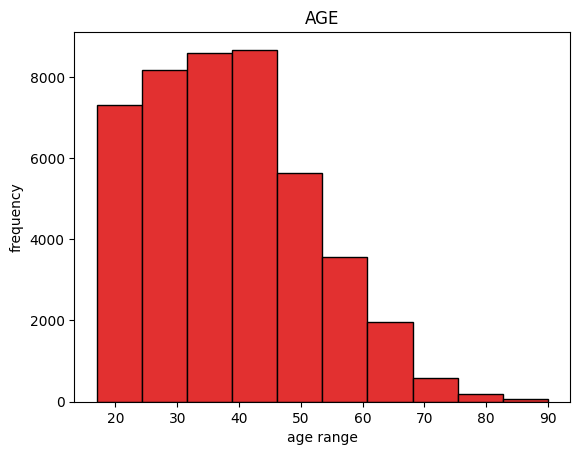

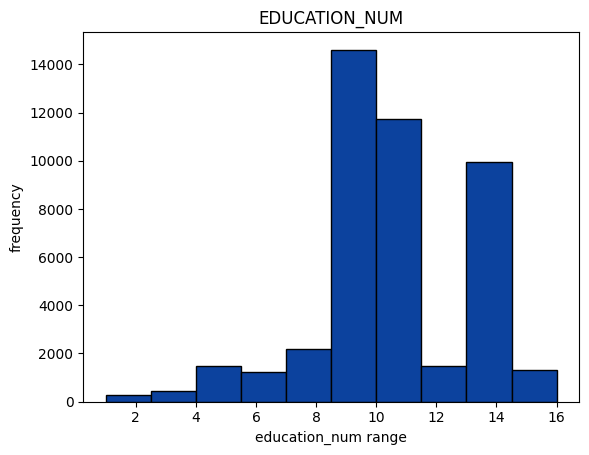

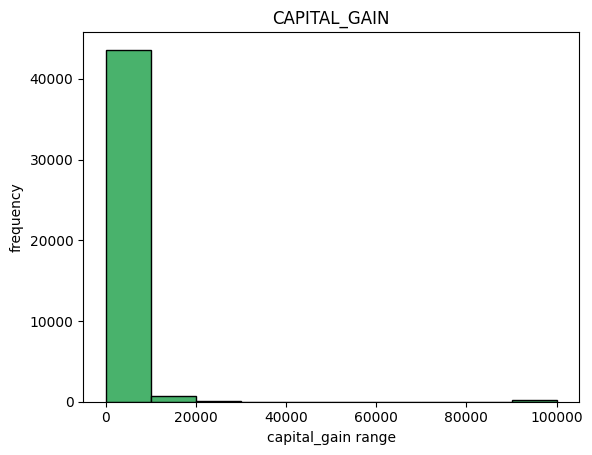

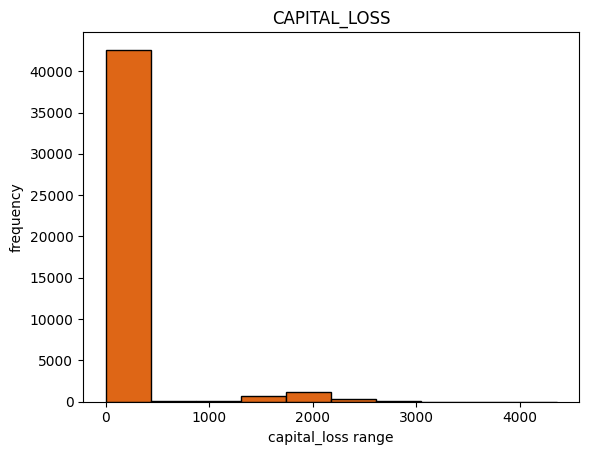

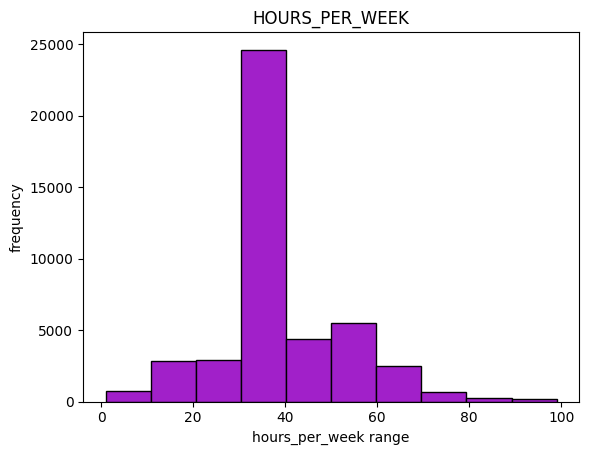

In [ ]:
colors = ['#E23030','#0C429E','#49B26C','#DE6616','#A120C9']
c=0
for col in numerical_features:
    plt.figure()
    plt.hist(numerical_x[col], edgecolor='black', color=colors[c])
    plt.xlabel(f'{col} range')
    plt.ylabel('frequency')
    plt.title(col.upper())
    c+=1

##### Insights:
1. Majority of people in the census are of age range 20-50
2. Most people have a capital gain and capital lose of zero
3. Many person works 30-40 hours per week

## OUTLIER REMOVAL

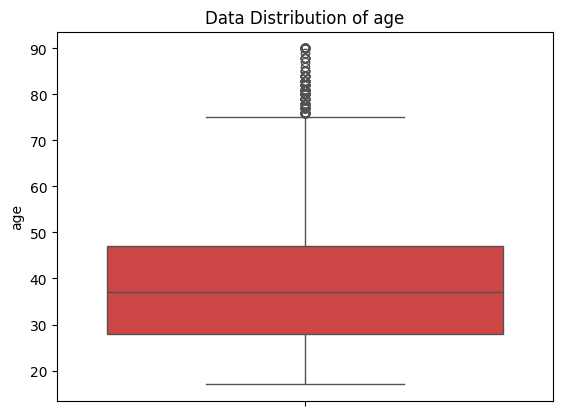

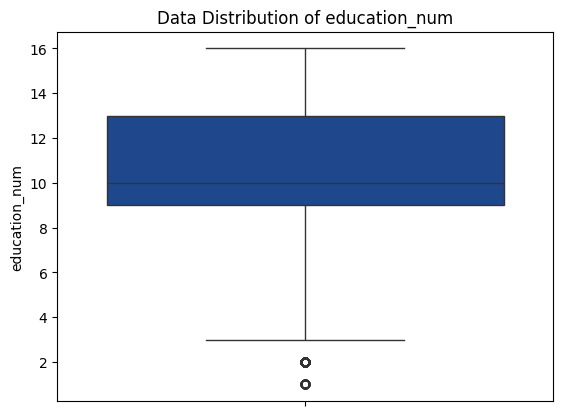

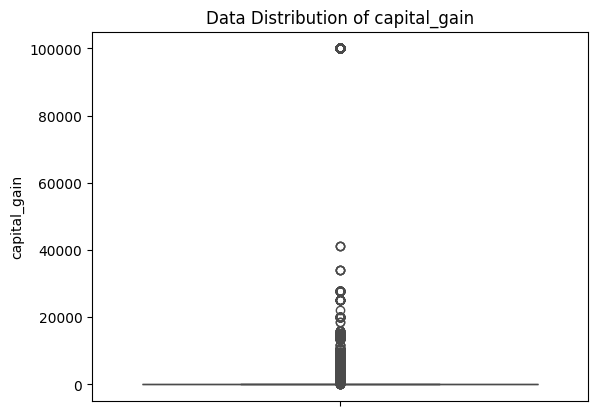

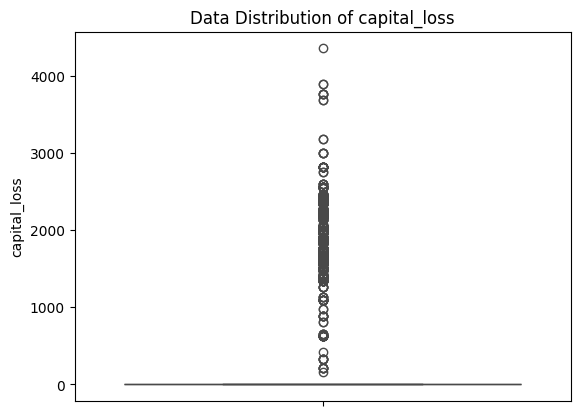

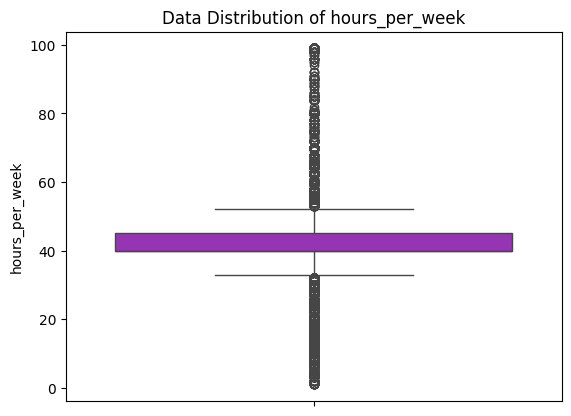

In [ ]:
colors = ['#E23030','#0C429E','#49B26C','#DE6616','#A120C9']
c=0
for col in numerical_features:
    plt.figure()
    sns.boxplot(numerical_x[col], color=colors[c])
    plt.ylabel(col)
    plt.title(f'Data Distribution of {col}')
    plt.show()
    c+=1

##### Insights:
1. Age have a slight right skewness. Outliers are old age group
2. Education has a slight left skewness. Outliers are persons having lower educational level
3. Hours per week have narrow edges on both sides. Outliers on left and right

In [ ]:
# # OUTLIER REMOVAL

# for col in numerical_features:
#     # Calculate the first and third quartiles (Q1 and Q3)
#     Q1 = numerical_x[col].quantile(0.25)
#     Q3 = numerical_x[col].quantile(0.75)

#     # Calculate the interquartile range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     outliers = (numerical_x[col] < lower_bound) | (numerical_x[col] > upper_bound)
#     # print(outliers)

#     # Check for outliers in any column for each row
#     outlier_rows = numerical_x.any(axis=1)
#     # print(outlier_rows)

#     # Collect indices of rows containing True values
#     outlier_indices = numerical_x.index[outliers].tolist()
#     # print(outlier_indices)

#     # Drop corresponding rows
#     numerical_x = numerical_x.drop(outlier_indices, axis=0)

#     categorical_x = categorical_x.drop(outlier_indices, axis=0)

#     y = y.drop(outlier_indices)

#     # Reset indices to ensure they are consistent across both DataFrames
#     numerical_x.reset_index(drop=True, inplace=True)
#     categorical_x.reset_index(drop=True, inplace=True)
#     y.reset_index(drop=True, inplace=True)

#### REMOVING OUTLIER BASED ON THE STANDARD DEVIATION THRESHOLD(Z-SCORE)

In [ ]:
from scipy.stats import zscore
import numpy as np

threshold = 3

# Iterate over each column
for column_name in numerical_features:
    z_scores = zscore(numerical_x[column_name])
    outlier_mask = (abs(z_scores) > threshold)

    # Replace values with NaN where outlier_mask is True
    numerical_x.loc[outlier_mask, column_name] = np.nan

# Drop rows with NaN values
numerical_x = numerical_x.dropna()

# Collect corresponding data from categorical_x and y
categorical_x = categorical_x.loc[numerical_x.index]
y = y.loc[numerical_x.index]

# Reset indices
numerical_x = numerical_x.reset_index(drop=True)
categorical_x = categorical_x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [ ]:
# checking how much outliers are removed
print(numerical_x.shape)
print(categorical_x.shape)
print(y.shape)

(41371, 5)
(41371, 75)
(41371,)


In [ ]:
x = pd.concat([numerical_x, categorical_x], axis=1)
x

,age,education_num,capital_gain,capital_loss,hours_per_week,work_class_Local-gov,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,18.0,9.0,0.0,0.0,20.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17.0,8.0,0.0,0.0,20.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,25.0,9.0,0.0,0.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,20.0,10.0,0.0,0.0,30.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,47.0,9.0,0.0,0.0,56.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41366,28.0,10.0,0.0,0.0,40.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41367,63.0,4.0,0.0,0.0,30.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
41368,21.0,9.0,0.0,0.0,40.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41369,23.0,9.0,0.0,0.0,40.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### HANDLING THE IMBALANCE OF DATASET

SMOTE(Synthetic Minority Over-sampling Technique) is used here to handle the imbalance.
1. For each minority class instance, SMOTE selects k nearest neighbors from the same class.
2. Synthetic instances are then generated along the line segments connecting the minority class instance and its k nearest neighbors.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x,y)

In [ ]:
y.value_counts()

<=50K    31977
>50K     31977
Name: income, dtype: int64

In [ ]:
numerical_x = x[numerical_features]
categorical_x = x.drop(numerical_features, axis=1)

In [ ]:
numerical_x.shape

(63954, 5)

#### SCALING THE NUMERICAL FEATURES TO A SIMILAR RANGE

In [ ]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
numerical_x = scaler.fit_transform(numerical_x)
numerical_x

array([[0.01639344, 0.46153846, 0.        , 0.        , 0.21126761],
       [0.        , 0.38461538, 0.        , 0.        , 0.21126761],
       [0.13114754, 0.46153846, 0.        , 0.        , 0.49295775],
       ...,
       [0.47540984, 0.77917034, 0.        , 0.        , 0.63380282],
       [0.40983607, 0.46153846, 0.        , 0.        , 0.49295775],
       [0.29061743, 0.76923077, 0.        , 0.        , 0.49295775]])

In [ ]:
numerical_x = pd.DataFrame(numerical_x,columns=numerical_features)
numerical_x

,age,education_num,capital_gain,capital_loss,hours_per_week
0,0.016393,0.461538,0.000000,0.0,0.211268
1,0.000000,0.384615,0.000000,0.0,0.211268
2,0.131148,0.461538,0.000000,0.0,0.492958
3,0.049180,0.538462,0.000000,0.0,0.352113
4,0.491803,0.461538,0.000000,0.0,0.718310
...,...,...,...,...,...
63949,0.406186,0.538462,0.000000,0.0,0.492958
63950,0.258476,0.579539,0.140789,0.0,0.650211
63951,0.475410,0.779170,0.000000,0.0,0.633803
63952,0.409836,0.461538,0.000000,0.0,0.492958


In [ ]:
categorical_x

,work_class_Local-gov,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,work_class_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63949,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
63950,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
63951,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
63952,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x = pd.concat([numerical_x,categorical_x], axis=1)
x

,age,education_num,capital_gain,capital_loss,hours_per_week,work_class_Local-gov,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.016393,0.461538,0.000000,0.0,0.211268,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.000000,0.384615,0.000000,0.0,0.211268,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.131148,0.461538,0.000000,0.0,0.492958,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.049180,0.538462,0.000000,0.0,0.352113,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.491803,0.461538,0.000000,0.0,0.718310,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63949,0.406186,0.538462,0.000000,0.0,0.492958,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
63950,0.258476,0.579539,0.140789,0.0,0.650211,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
63951,0.475410,0.779170,0.000000,0.0,0.633803,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
63952,0.409836,0.461538,0.000000,0.0,0.492958,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y.value_counts()

<=50K    31977
>50K     31977
Name: income, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
y_train.value_counts()

<=50K    22397
>50K     22370
Name: income, dtype: int64

## MODEL CREATION AND CROSS VALIDATION

#### KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model1 = KNeighborsClassifier()
parameters1 = {
    'n_neighbors':[i for i in range(3,14,2)],
    'weights':['uniform','distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search1 = GridSearchCV(model1, parameters1, cv=5, scoring='accuracy')
grid_search1.fit(x_train,y_train)

In [ ]:
params_dict1 = grid_search1.best_params_
params_dict1

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
# model_knn = KNeighborsClassifier(n_neighbors=params_dict1['n_neighbors'],weights=params_dict1['weights'])
model_knn = KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

#### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model2 = SVC()
parameters2 = {'kernel':['linear', 'poly', 'rbf'], 'C':[0.1, 1, 10, 100, 1000]}  # 'sigmoid'

'''
C (Regularization parameter): This parameter trades off correct classification of training examples against
maximization of the decision function's margin. A smaller C encourages a larger margin and a simpler decision
boundary, while a larger C aims to classify all training points correctly.

kernel: The choice of kernel function defines the type of decision boundary. Common choices include 'linear',
'poly' (polynomial), 'rbf' (radial basis function), and 'sigmoid'. The appropriate kernel depends on the nature
of your data.
'''

gridsearch2 = GridSearchCV(model2, parameters2, cv=5, scoring='accuracy')
gridsearch2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [ ]:
params_dict2 = gridsearch2.best_params_
params_dict2

{'C': 10, 'kernel': 'rbf'}

In [ ]:
# model_svm = SVC(C=params_dict2['C'], kernel=params_dict2['kernel'])
model_svm = SVC(C=10, kernel='rbf')
model_svm.fit(x_train,y_train)

SVC(C=10)

### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model3 = LogisticRegression()
parameters3 = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search3 = GridSearchCV(model3, parameters3, cv=5, scoring='accuracy')
grid_search3.fit(x_train,y_train)

In [ ]:
params_dict3 = grid_search3.best_params_
params_dict3

{'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
# model_lr = LogisticRegression(penalty=params_dict4['penalty'], C=params_dict4['C'],
#     solver=params_dict4['solver'], max_iter=params_dict4['max_iter'])
model_lr = LogisticRegression(C=100, max_iter=200, penalty='l2', solver='lbfgs')
model_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, max_iter=200)

### decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model4 = DecisionTreeClassifier(random_state=42)
parameters4 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search4 = GridSearchCV(model4, parameters4, cv=5, scoring='accuracy')
grid_search4.fit(x_train,y_train)

In [ ]:
params_dict4 = grid_search4.best_params_
params_dict4

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
# model_dt = grid_search5.best_estimator_
model_dt = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=20, max_features=None,
                                  min_samples_leaf=4, min_samples_split=2, splitter='best')
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, random_state=42)

### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model5 = RandomForestClassifier(random_state=42)
parameters5 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search5 = GridSearchCV(model5, parameters5, cv=5, scoring='accuracy')
grid_search5.fit(x_train, y_train)

In [ ]:
params_dict5 = grid_search5.best_params_
params_dict5

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
# model_rf = grid_search5.best_estimator_
model_rf = RandomForestClassifier(
    random_state=42,
    max_depth=None,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200
)
model_rf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=5,
                       n_estimators=200, random_state=42)

## Performance Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
for i in [model_knn,model_svm,model_lr,model_dt,model_rf]:
    y_pred = i.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    matr = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print(i)
    print("\033[1m" + f'Accuracy score : {score}' + "\033[0m")
    print('Confusion matrix :\n',matr)
    print('Classification report :\n', report)
    print
    print('-'*50)

KNeighborsClassifier(n_neighbors=9, weights='distance')
Accuracy score : 0.8756970865690311
Confusion matrix :
 [[8340 1240]
 [1145 8462]]
Classification report :
               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      9580
        >50K       0.87      0.88      0.88      9607

    accuracy                           0.88     19187
   macro avg       0.88      0.88      0.88     19187
weighted avg       0.88      0.88      0.88     19187

--------------------------------------------------
SVC(C=10)
Accuracy score : 0.8744983582634075
Confusion matrix :
 [[8277 1303]
 [1105 8502]]
Classification report :
               precision    recall  f1-score   support

       <=50K       0.88      0.86      0.87      9580
        >50K       0.87      0.88      0.88      9607

    accuracy                           0.87     19187
   macro avg       0.87      0.87      0.87     19187
weighted avg       0.87      0.87      0.87     19187

-------------

### RandomForestClassifier is slightly better than other with an accuracy of 89.53%.

#

## MODEL DEPLOYMENT

In [ ]:
num_df = pd.DataFrame()
for i in numerical_features:
    if i=='education_num':
        print(f'Choose education_num from {education_dict}')
    ip = float(input(f'Enter {i} : '))
    num_df[i] = [ip]
scaled_values = scaler.transform(num_df)

pred_df = pd.DataFrame()
pred_df[numerical_features] = scaled_values

pred_df[categorical_x.columns] = [np.zeros([1,len(categorical_x.columns)], dtype=np.int64).ravel()]
for j in categorical_features:
    ip = input(f'Enter {j} from {df[j].unique()} : ')
    if f'{j}_{ip}' in pred_df.columns:
        pred_df[f'{j}_{ip}'] = 1
pred_df

Enter age : 45
Choose education_num from {' Preschool': 1, ' 1st-4th': 2, ' 5th-6th': 3, ' 7th-8th': 4, ' 9th': 5, ' 10th': 6, ' 11th': 7, ' 12th': 8, ' HS-grad': 9, ' Some-college': 10, ' Assoc-voc': 11, ' Assoc-acdm': 12, ' Bachelors': 13, ' Masters': 14, ' Prof-school': 15, ' Doctorate': 16}
Enter education_num : 16
Enter capital_gain : 10000
Enter capital_loss : 0
Enter hours_per_week : 50
Enter work_class from ['Private' 'Local-gov' 'Federal-gov' 'State-gov' 'Self-emp-not-inc'
 'Self-emp-inc' 'Without-pay'] : Private
Enter marital_status from ['Never-married' 'Married-civ-spouse' 'Divorced' 'Widowed'
 'Married-spouse-absent' 'Separated' 'Married-AF-spouse'] : Married-civ-spouse
Enter occupation from ['Other-service' 'Sales' 'Handlers-cleaners' 'Machine-op-inspct'
 'Craft-repair' 'Prof-specialty' 'Adm-clerical' 'Exec-managerial'
 'Transport-moving' 'Farming-fishing' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces'] : Prof-specialty
Enter relationship from ['Not-in

,age,education_num,capital_gain,capital_loss,hours_per_week,work_class_Local-gov,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.459016,1.0,0.453721,0.0,0.633803,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(f'Based on the data you entered the prediction of income : {model_rf.predict(pred_df)[0]}')

Based on the data you entered the prediction of income : >50K
